In [2]:
#%load_ext autoreload
#%autoreload 2
#from barbaras_functions import *

import pandas as pd
import seaborn as sns
file_path = '/Users/Barbara/Desktop/Ironhack/Quest/Week 2/GSAF5.xls'
df = pd.read_excel(file_path)


In [3]:
df.shape

(6969, 23)

In [31]:
#dropping all the empty rows and columns
df = df.dropna(axis=1,how='all')
df = df.dropna(how='all')

#dropping the duplicates
df.drop_duplicates(inplace=True)
df.columns = [c.lower().replace(' ','_') for c in df.columns]

#removing unnessesary columns
columns_to_remove = ['date', 'name', 'location', 'injury', 'source', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1', 'original_order', 'unnamed:_21', 'unnamed:_22', 'species_']
columns_to_remove = [col for col in columns_to_remove if col in df.columns]
df = df.drop(columns=columns_to_remove)

#renaming a column
df.rename(columns={'unnamed:_11': 'fatal'}, inplace=True)

#cleaning the type column
def clean_type(value):
    if isinstance(value, str):
        value = value.strip()  # Strip whitespace
        if value in ["?", "Unconfirmed", "Unverified", "Under investigation"]:
            return 'Questionable'
        elif value in ["Watercraft", "Boat"]:
            return 'Sea Disaster'
        elif value == "Invalid":
            return 'Unknown'
    return value

df["type"] = df["type"].apply(clean_type)

#cleaning the sex column
def clean_sex(value):
    if isinstance(value, str):
        value = value.strip()  # Strip whitespace
        if value in ["N", "lli", "M x 2", "."]:
            return 'M'
        elif value == "Invalid":
            return 'Unknown'
    return value

df["sex"] = df["sex"].apply(clean_sex)

#cleaning the country and state column
def clean_country_state(value):
    if isinstance(value, str):
        value = value.strip().lower().capitalize()
    return value

df["country"] = df["country"].apply(clean_country_state)
df["state"] = df["state"].apply(clean_country_state)

#cleaning the activity column

def treatnulls(x):
    if x == False or x == "nan":
        return "Unknown"
    else:
        return str(x)

def rename_activity(x):
    if len(x.split()) == 1:
        return x
    elif x.lower().find("fishing"):
        return "Fishing"
    elif x.lower().find("diving"):
        return "Diving"
    elif x.lower().find("wreck") or x.lower().find("adrift") or x.lower().find("storm"):
        return "Accident"
df["activity"] = df["activity"].apply(lambda x: treatnulls(x))
df["activity"] = df["activity"].apply(lambda x: rename_activity(x))
df["activity"] = df["activity"].replace({"Swimming/": "Swimming", "Crawling": "Swimming", "Swmming": "Swimming", "Fisherman": "Fishing", "Net-fishing": "Fishing", "kite surfing": "Kite_surfing", "Spearishing": "Spearfishing", "Fishing?": "Fishing", "Fishingat": "Fishing", "Stamding":"Standing", "Wading?": "Wading"})

#cleaning the time column
def split_time(x):
    if x == "NaN" or x == "nan" or x == False or x is None:
        return "Unknown"
    elif str(x).find("h"):
        return str(x).strip().split("h")[0]
    else:
        return str(x)
def cast_time(x):
    if x.isdigit():
        if 00 <= int(x) < 12:
            return "Morning"
        elif 12 <= int(x) < 17:
            return "Afternoon"
        elif 17 <= int(x) < 21:
            return "Evening"
        elif 21 <= int(x) <= 23:
            return "Night"
    else:
        return x
df["time"] = df["time"].apply(lambda x: split_time(x))
df["time_of_day"] = (df["time"].apply(lambda x: cast_time(x)))

#cleaning the age column
df["age"] = df["age"].apply(lambda x: int(x) if isinstance(x, str) and x.isdigit() else x)
df["age"] = df["age"].apply(lambda x: int(x) if isinstance(x, (int, float)) and 0 <= x <= 100 else None if x is not None else x)

#removing the time column
df = df.drop(columns='time')

#resetting the index
df.reset_index(drop=True, inplace=True)

In [32]:
df

,year,type,country,state,activity,sex,age,fatal,time_of_day
0,2024.0,Unprovoked,Australia,Queensland,Swimming,F,13.0,NaN,Afternoon
1,2024.0,Unprovoked,Usa,Hawaii,Surfing,M,NaN,N,Unknown
2,2024.0,Unprovoked,Usa,Hawaii,Swimming,F,11.0,N,Afternoon
3,2024.0,Unprovoked,Australia,Western australia,Unknown,F,46.0,N,Morning
4,2024.0,Unprovoked,India,Maharashtra,Fishing,M,32.0,N,Unknown
...,...,...,...,...,...,...,...,...,...
6820,0.0,Unprovoked,Australia,Western australia,Fishing,M,NaN,Y,Unknown
6821,0.0,Unprovoked,Usa,North carolina,Swimming,M,NaN,Y,Unknown
6822,0.0,Unprovoked,Panama,NaN,Unknown,M,NaN,Y,Unknown
6823,0.0,Unprovoked,Ceylon (sri lanka),Eastern province,Swimming,M,15.0,Y,Unknown


In [6]:
df.describe(include=['object'])


,type,country,state,activity,sex,fatal,time,time_of_day
count,6926,6894,6462,6945,6365,6382,6945,6938
unique,5,209,872,98,2,12,111,81
top,Unprovoked,Usa,Florida,Fishing,M,N,nan,nan
freq,5107,2538,1179,2586,5586,4832,3527,3527


In [29]:
#df_fatal = df[df['fatal'] == 'Y']
#df_fatal
#df_fatal.groupby(['sex', 'activity'])['year'].count()

In [9]:
df_non_fatal_F = df[(df['fatal'] == 'N') & (df['sex'] == 'F')]
df_non_fatal_F['activity'].value_counts()

activity
Fishing              146
Swimming             136
Surfing               65
Wading                64
Snorkeling            46
nan                   37
Standing              29
Bathing                8
Spearfishing           8
Diving                 5
Walking                5
Playing                4
Kayaking               4
Floating               4
Swimming               2
Canoeing               2
Jumping                2
Windsurfing            2
Floating               1
Paddle-boarding        1
Standing               1
Playing                1
Rowing                 1
Batin                  1
Sitting                1
Surf-skiing            1
Wakeboarding           1
Rescuing               1
Body-surfing           1
Kiteboarding           1
Kayaking               1
Surf-sking             1
Paddling               1
Scalloping             1
Swimming/Standing      1
Swimmingq              1
Splashing              1
Name: count, dtype: int64

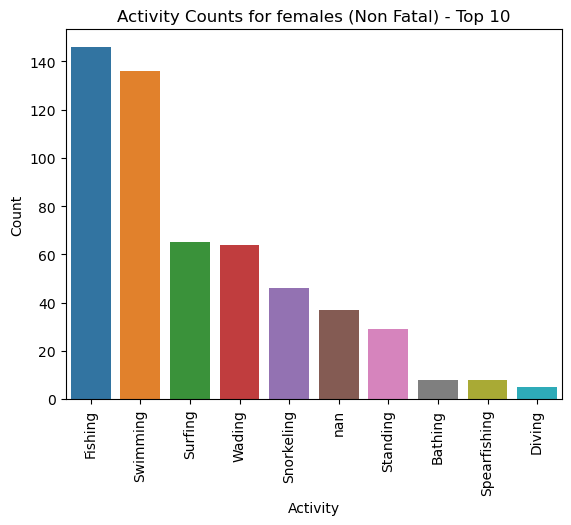

In [56]:
import matplotlib.pyplot as plt

activity_counts = df_non_fatal_F['activity'].value_counts().reset_index()
activity_counts.columns = ['activity', 'count']

top_act_NF_F = activity_counts.head(10)

ax = sns.barplot(x='activity', y='count', data=top_act_NF_F)
ax.set_title('Activity Counts for females (Non Fatal) - Top 10')
ax.set_xlabel('Activity')
ax.set_ylabel('Count')

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [58]:
df_non_fatal_M = df[(df['fatal'] == 'N') & (df['sex'] == 'M')]
df_non_fatal_M['activity'].value_counts()

activity
Fishing         1356
Surfing          906
Swimming         407
Spearfishing     281
Unknown          188
                ... 
Floating           1
Bodyboarding       1
Surfng             1
Bodysurfing        1
Hilo               1
Name: count, Length: 72, dtype: int64

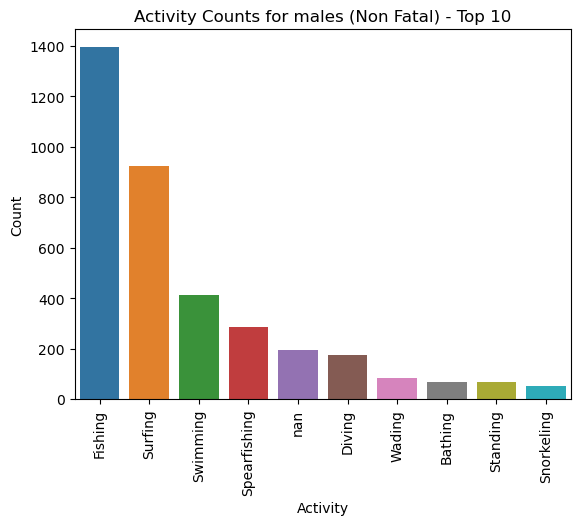

In [57]:
activity_counts1 = df_non_fatal_M['activity'].value_counts().reset_index()
activity_counts1.columns = ['activity', 'count']

top_act_NF_M = activity_counts1.head(10)

ax = sns.barplot(x='activity', y='count', data=top_act_NF_M)
ax.set_title('Activity Counts for males (Non Fatal) - Top 10')
ax.set_xlabel('Activity')
ax.set_ylabel('Count')

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [59]:
df_fatal_F = df[(df['fatal'] == 'Y') & (df['sex'] == 'F')]
df_fatal_F['activity'].value_counts()

activity
Fishing       38
Swimming      37
Unknown       10
Snorkeling     9
Bathing        6
Diving         4
Standing       3
Surfing        2
Swimming       2
Wading         2
Walking        1
Kayaking       1
Floating       1
Watercraft     1
Name: count, dtype: int64

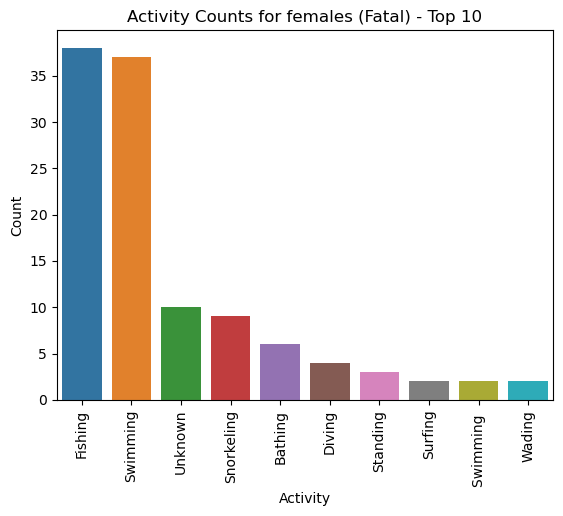

In [60]:
activity_counts4 = df_fatal_F['activity'].value_counts().reset_index()
activity_counts4.columns = ['activity', 'count']

top_act_F_F = activity_counts4.head(10)

ax = sns.barplot(x='activity', y='count', data=top_act_F_F)
ax.set_title('Activity Counts for females (Fatal) - Top 10')
ax.set_xlabel('Activity')
ax.set_ylabel('Count')

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [61]:
df_fatal_M = df[(df['fatal'] == 'Y') & (df['sex'] == 'M')]
df_fatal_M['activity'].value_counts()

activity
Fishing             579
Swimming            270
Unknown              79
Surfing              60
Bathing              60
Diving               46
Spearfishing         45
Swimming             19
Standing             14
Wading               13
Snorkeling           10
Windsurfing           4
Shipwreck             3
Washing               2
Murder                2
Skindiving            2
Spearfishing          2
Floating              1
Fishing               1
Bathing/Swimming      1
Walking               1
Diving?               1
.                     1
Suicide               1
Body-boarding         1
Murdered              1
Canoeing              1
Name: count, dtype: int64

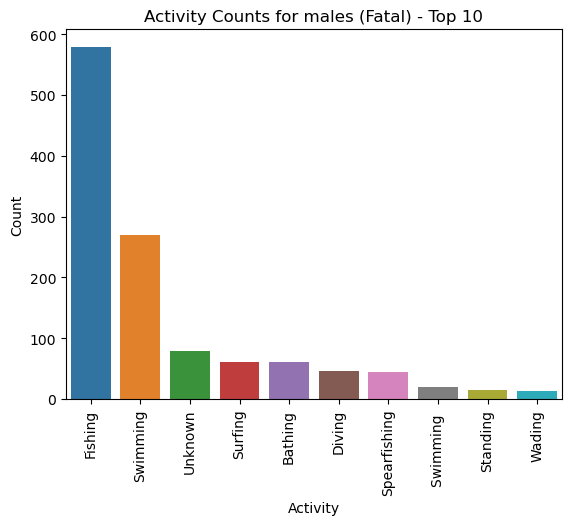

In [62]:
activity_counts2 = df_fatal_M['activity'].value_counts().reset_index()
activity_counts2.columns = ['activity', 'count']

top_act_F_M = activity_counts2.head(10)

ax = sns.barplot(x='activity', y='count', data=top_act_F_M)
ax.set_title('Activity Counts for males (Fatal) - Top 10')
ax.set_xlabel('Activity')
ax.set_ylabel('Count')

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [ ]:
#df_non_fatal_F = pd.DataFrame(data)

#sns.barplot(x='activity', y='sex', data=df_non_fatal_F)

In [13]:
df['age'].value_counts()

age
17.0    173
18.0    157
15.0    155
20.0    151
19.0    150
       ... 
72.0      1
86.0      1
84.0      1
87.0      1
81.0      1
Name: count, Length: 81, dtype: int64

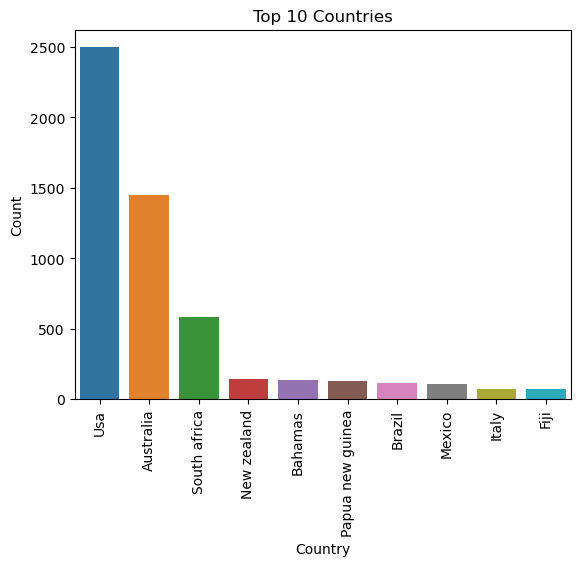

In [47]:
activity_counts5 = df['country'].value_counts().reset_index()
activity_counts5.columns = ['country', 'count']

top_countries = activity_counts5.head(10)

ax = sns.barplot(x='country', y='count', data=top_countries)
ax.set_title('Top 10 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [14]:
df['country'].value_counts()

country
Usa                               2538
Australia                         1481
South africa                       598
New zealand                        145
Papua new guinea                   136
                                  ... 
British west indies                  1
Admiralty islands                    1
Federated states of micronesia       1
Turks and caicos                     1
Ceylon (sri lanka)                   1
Name: count, Length: 209, dtype: int64

In [30]:
df['state'].value_counts()

state
Florida                   1179
New south wales            522
Queensland                 348
Hawaii                     341
California                 323
                          ... 
Central philippines          1
Northwest italy              1
North & south carolina       1
Carolina coast               1
Moala island                 1
Name: count, Length: 872, dtype: int64

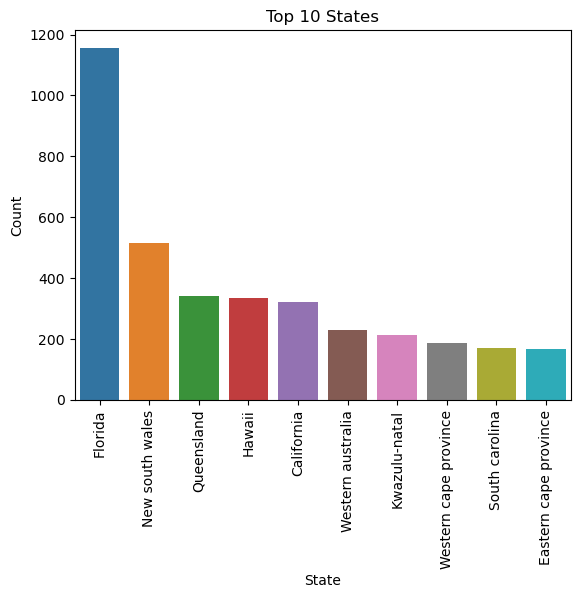

In [49]:
activity_counts6 = df['state'].value_counts().reset_index()
activity_counts6.columns = ['state', 'count']

top_states = activity_counts6.head(10)

ax = sns.barplot(x='state', y='count', data=top_states)
ax.set_title('Top 10 States')
ax.set_xlabel('State')
ax.set_ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [50]:

df['time_of_day'].value_counts()

time_of_day
Unknown                          3423
Afternoon                        1490
Morning                          1109
Evening                           507
Nig                                65
                                 ... 
Mid afternoon                       1
Mid morning                         1
"Nig                                1
30 minutes after 1992.07.08.a       1
dusk                                1
Name: count, Length: 80, dtype: int64

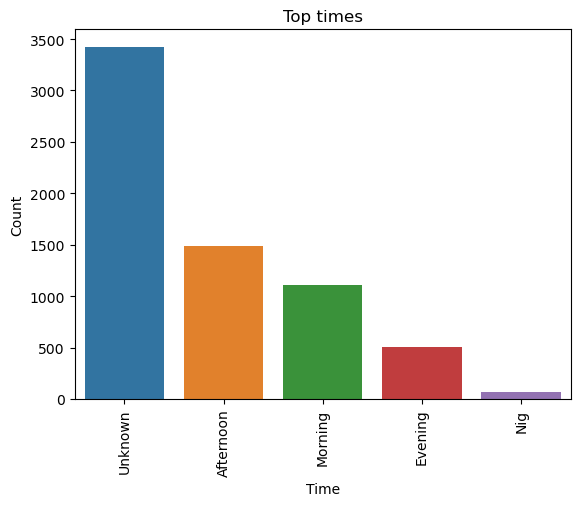

In [63]:
activity_counts7 = df['time_of_day'].value_counts().reset_index()
activity_counts7.columns = ['time_of_day', 'count']

top_times = activity_counts7.head(5)

ax = sns.barplot(x='time_of_day', y='count', data=top_times)
ax.set_title('Top times')
ax.set_xlabel('Time')
ax.set_ylabel('Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [28]:
df_non_fatal = df[df['fatal'] == 'N']
df_non_fatal['time_of_day'].value_counts()

time_of_day
nan                    2140
Afternoon              1209
Morning                 885
Evening                 408
Nig                      32
                       ... 
"Just before 11           1
Just before sundown       1
Just after 12             1
8:04 pm                   1
Late Afternoon            1
Name: count, Length: 61, dtype: int64

In [16]:
df.pivot_table(index='sex', columns = 'activity', values=['year'], aggfunc='count')

year                                                       \
activity    . Angling Bathing Bathing  Bathing/Swimming Batin Boat   
sex                                                                  
F         NaN     NaN    16.0      NaN              NaN   1.0  NaN   
M         3.0     1.0   141.0      3.0              1.0   NaN  2.0   

                                                  ...                       \
activity Body-boarding Body-surfing Bodyboarding  ... Unknown Wade-fishing   
sex                                               ...                        
F                  NaN          1.0          NaN  ...     1.0          NaN   
M                  4.0          NaN          1.0  ...     2.0          3.0   

                                                                      \
activity Wading Wakeboarding Walking Washing Water-skiing Watercraft   
sex                                                                    
F          67.0          1.0     8.0     NaN          NaN        1.0   
M         105.0          NaN     9.0     2.0          1.0        3.0   

                             
activity Windsurfing    nan  
sex                          
F                2.0   64.0  
M               18.0  368.0  

[2 rows x 91 columns]